In [10]:
import pandas as pd
import numpy as np

#Imports to enable visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Python standard libraries
import glob, os    

In [40]:
#Functions

def read_df_from_csv_folder(folderpath,filename_pattern):
    return pd.concat(map(pd.read_csv, glob.glob(os.path.join(folderpath, filename_pattern))))


### Read Data

In [5]:
base_folderpath = '/local/tarciso/masters/experiments/preliminary-exp/preliminary-exp-sample-data/buste-v3a/'

In [41]:
imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')

In [42]:
imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,rank,executed_duration,imp_capacity
0,2017-05-10,155,3,29.333333,1,67.133333,37.800000
1,2017-05-10,8589934624,3,6.233333,1,5.800000,-0.433333
2,2017-05-10,154618822964,1,10.033333,1,8.916667,-1.116667
3,2017-05-10,283467841673,2,23.083333,1,18.650000,-4.433333
4,2017-05-10,343597383828,2,13.333333,1,36.066667,22.733333


### Analyzing Distribution

#### Overall

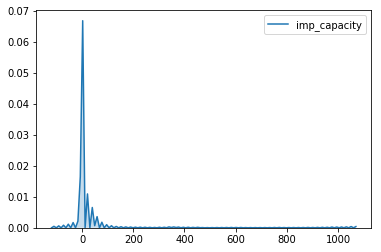

In [12]:
sns.kdeplot(imp_cap_df.imp_capacity, shade=True)

In [32]:
imp_cap_df.imp_capacity.describe()

count    4991.000000
mean       25.009717
std       106.219846
min      -114.233333
25%        -1.066667
50%         0.566667
75%        10.566667
max      1064.600000
Name: imp_capacity, dtype: float64

#### Removing outliers (lower/higher 5%)

In [17]:
fith_perc = np.percentile(imp_cap_df.imp_capacity,5)
ninety_fith_perc = np.percentile(imp_cap_df.imp_capacity,95)

print fith_perc, ninety_fith_perc

-4.11666666667 69.1333333333


In [28]:
filtered_imp_cap_df = imp_cap_df[(imp_cap_df.imp_capacity > fith_perc) & (imp_cap_df.imp_capacity < ninety_fith_perc)]

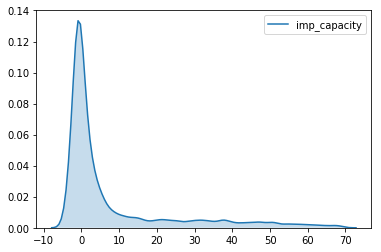

In [29]:
sns.kdeplot(filtered_imp_cap_df.imp_capacity, shade=True)

In [30]:
filtered_imp_cap_df.imp_capacity.describe()

count    4489.000000
mean        7.916139
std        15.809032
min        -4.100000
25%        -0.933333
50%         0.566667
75%         7.650000
max        69.033333
Name: imp_capacity, dtype: float64

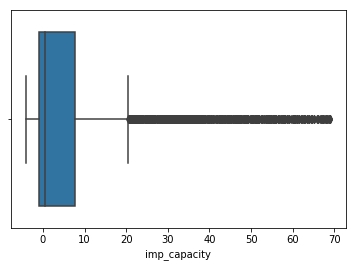

In [31]:
sns.boxplot(x=filtered_imp_cap_df.imp_capacity)

#### Per Hour of Day

In [43]:
#Reading full data
trips_itineraries = read_df_from_csv_folder(base_folderpath + '/trips_actual_itineraries/','part-*.csv')

In [119]:
trips_itineraries.columns

Index([u'date', u'user_trip_id', u'itinerary_id', u'leg_id', u'route',
       u'from_stop_id', u'to_stop_id', u'otp_start_time', u'otp_end_time',
       u'mode', u'otp_duration_mins', u'busCode', u'tripNum',
       u'from_timestamp', u'to_timestamp', u'actual_duration_mins',
       u'considered_duration_mins', u'hour_of_day'],
      dtype='object')

In [48]:
trips_itineraries.describe()

,user_trip_id,itinerary_id,leg_id,route,from_stop_id,to_stop_id,otp_duration_mins,tripNum,actual_duration_mins,considered_duration_mins
count,3.941200e+04,39412.000000,39412.000000,12993.00000,12993.000000,12993.000000,39412.000000,12993.000000,12993.000000,39412.000000
mean,8.576164e+11,2.002664,1.999188,452.80882,30869.338490,29619.819518,6.250978,5.935427,18.566559,6.997918
std,4.939486e+11,0.819857,0.871104,279.48598,5081.443152,5161.152056,10.347315,4.050072,45.090625,27.202290
min,2.000000e+00,1.000000,1.000000,1.00000,270.000000,70.000000,0.016667,1.000000,0.100000,0.016667
25%,4.294967e+11,1.000000,1.000000,183.00000,28946.000000,26376.000000,0.150000,3.000000,6.700000,0.150000
50%,8.589935e+11,2.000000,2.000000,464.00000,31002.000000,29892.000000,0.983333,5.000000,14.116667,1.000000
75%,1.279900e+12,3.000000,3.000000,685.00000,33613.000000,32654.000000,7.520833,8.000000,23.483333,8.033333
max,1.709397e+12,3.000000,8.000000,972.00000,48762.000000,48641.000000,83.900000,43.000000,1086.233333,1086.233333


In [70]:
trips_itineraries.head(10)

,date,user_trip_id,itinerary_id,leg_id,route,from_stop_id,to_stop_id,otp_start_time,otp_end_time,mode,otp_duration_mins,busCode,tripNum,from_timestamp,to_timestamp,actual_duration_mins,considered_duration_mins,hour_of_day
0,2017-05-10,51539607829,3,3,NaN,NaN,NaN,2017-05-10T13:10:17.000-03:00,2017-05-10T13:10:29.000-03:00,WALK,0.200000,NaN,NaN,NaT,NaN,NaN,0.200000,NaN
1,2017-05-10,51539607829,3,2,703.0,26140.0,35233.0,2017-05-10T12:46:00.000-03:00,2017-05-10T13:10:16.000-03:00,BUS,24.266667,JC304,5.0,2017-05-10 12:42:55,2017-05-10 13:08:13,25.300000,25.300000,12.0
2,2017-05-10,51539607829,3,1,NaN,NaN,NaN,2017-05-10T12:45:57.000-03:00,2017-05-10T12:45:59.000-03:00,WALK,0.033333,NaN,NaN,NaT,NaN,NaN,0.033333,NaN
3,2017-05-10,60129542404,3,3,NaN,NaN,NaN,2017-05-10T06:49:10.000-03:00,2017-05-10T06:49:14.000-03:00,WALK,0.066667,NaN,NaN,NaT,NaN,NaN,0.066667,NaN
4,2017-05-10,60129542404,3,1,NaN,NaN,NaN,2017-05-10T06:39:40.000-03:00,2017-05-10T06:40:01.000-03:00,WALK,0.350000,NaN,NaN,NaT,NaN,NaN,0.350000,NaN
5,2017-05-10,60129542404,3,2,701.0,35239.0,32830.0,2017-05-10T06:40:02.000-03:00,2017-05-10T06:49:09.000-03:00,BUS,9.116667,JC306,1.0,2017-05-10 06:35:16,2017-05-10 06:42:43,7.450000,7.450000,6.0
6,2017-05-10,111669149823,1,1,182.0,31854.0,28615.0,2017-05-10T12:48:54.000-03:00,2017-05-10T13:16:51.000-03:00,BUS,27.950000,BC302,9.0,2017-05-10 12:49:45,2017-05-10 13:15:13,25.466667,25.466667,12.0
7,2017-05-10,111669149823,1,2,NaN,NaN,NaN,2017-05-10T13:16:52.000-03:00,2017-05-10T13:17:53.000-03:00,WALK,1.016667,NaN,NaN,NaT,NaN,NaN,1.016667,NaN
8,2017-05-10,111669149935,1,1,NaN,NaN,NaN,2017-05-10T06:32:46.000-03:00,2017-05-10T06:41:54.000-03:00,WALK,9.133333,NaN,NaN,NaT,NaN,NaN,9.133333,NaN
9,2017-05-10,120259084397,3,1,NaN,NaN,NaN,2017-05-10T10:05:35.000-03:00,2017-05-10T10:18:26.000-03:00,WALK,12.850000,NaN,NaN,NaT,NaN,NaN,12.850000,NaN


In [62]:
trips_itineraries['from_timestamp'] = pd.to_datetime(trips_itineraries['from_timestamp'])
trips_itineraries['hour_of_day'] = trips_itineraries['from_timestamp'].dt.hour

In [64]:
grouped.agg({'C' : np.sum,
   ....:              'D' : lambda x: np.std(x, ddof=1)})

,from_timestamp,hour_of_day
0,NaT,NaN
1,2017-05-10 12:42:55,12.0
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN
5,2017-05-10 06:35:16,6.0
6,2017-05-10 12:49:45,12.0
7,NaT,NaN
8,NaT,NaN
9,NaT,NaN


In [80]:
simple_trips_itineraries = trips_itineraries.groupby(['date', 'user_trip_id', 'itinerary_id']) \
                            .agg({'considered_duration_mins': np.sum,
                                  'hour_of_day': lambda x: np.min(x)}).reset_index()

In [81]:
simple_trips_itineraries.head()

,date,user_trip_id,itinerary_id,hour_of_day,considered_duration_mins
0,2017-05-10,2,1,8.0,27.766667
1,2017-05-10,2,2,9.0,32.783333
2,2017-05-10,2,3,9.0,32.716667
3,2017-05-10,9,1,18.0,11.300000
4,2017-05-10,9,2,NaN,3.383333


In [82]:
imp_hour_of_day = filtered_imp_cap_df.merge(simple_trips_itineraries, 'left', on=['date','user_trip_id','itinerary_id'])

In [83]:
imp_hour_of_day.head()

,date,user_trip_id,itinerary_id,duration,rank,executed_duration,imp_capacity,hour_of_day,considered_duration_mins
0,2017-05-10,155,3,29.333333,1,67.133333,37.800000,14.0,29.333333
1,2017-05-10,8589934624,3,6.233333,1,5.800000,-0.433333,13.0,6.233333
2,2017-05-10,154618822964,1,10.033333,1,8.916667,-1.116667,12.0,10.033333
3,2017-05-10,343597383828,2,13.333333,1,36.066667,22.733333,9.0,13.333333
4,2017-05-10,377957122273,2,2.433333,1,2.483333,0.050000,6.0,2.433333


In [104]:
period_of_day_list = [('hour_of_day', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]),
         ('period_of_day', ['very_late_night','very_late_night','very_late_night','very_late_night','early_morning','early_morning','early_morning','morning','morning','morning','morning','midday','midday','midday','afternoon','afternoon','afternoon','early_night','early_night','early_night','night','night','late_night','late_night'])]
period_of_day_df = pd.DataFrame.from_items(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

period_of_day_df

,hour_of_day,period_of_day
0,0,very_late_night
1,1,very_late_night
2,2,very_late_night
3,3,very_late_night
4,4,early_morning
5,5,early_morning
6,6,early_morning
7,7,morning
8,8,morning
9,9,morning


In [105]:
imp_period_of_day = imp_hour_of_day.merge(period_of_day_df, how='inner', on='hour_of_day')

In [106]:
imp_period_of_day.head()

,date,user_trip_id,itinerary_id,duration,rank,executed_duration,imp_capacity,hour_of_day,considered_duration_mins,period_of_day
0,2017-05-10,155,3,29.333333,1,67.133333,37.800000,14,29.333333,afternoon
1,2017-05-10,876173328595,1,18.100000,1,15.400000,-2.700000,14,18.100000,afternoon
2,2017-05-10,850403524718,2,22.866667,1,25.650000,2.783333,14,22.866667,afternoon
3,2017-05-10,996432412715,3,5.950000,1,6.516667,0.566667,14,5.950000,afternoon
4,2017-05-10,412316860733,3,27.650000,1,44.733333,17.083333,14,27.650000,afternoon


In [118]:
itineraries_with_no_hour_of_day = imp_hour_of_day[np.isnan(imp_hour_of_day['hour_of_day'])]
print len(itineraries_with_no_hour_of_day)
itineraries_with_no_hour_of_day

270


,date,user_trip_id,itinerary_id,duration,rank,executed_duration,imp_capacity,hour_of_day,considered_duration_mins
48,2017-05-10,163208757462,2,4.200000,1,1.450000,-2.750000,NaN,4.200000
66,2017-05-10,1331439861769,1,6.766667,1,54.433333,47.666667,NaN,6.766667
76,2017-05-10,481036337412,1,7.416667,1,40.800000,33.383333,NaN,7.416667
114,2017-05-10,1597727834397,1,4.683333,1,3.650000,-1.033333,NaN,4.683333
135,2017-05-10,1546188226626,2,4.583333,1,2.600000,-1.983333,NaN,4.583333
145,2017-05-10,395136991327,2,7.016667,1,3.400000,-3.616667,NaN,7.016667
149,2017-05-10,901943132160,1,0.550000,1,24.050000,23.500000,NaN,0.550000
163,2017-05-10,1683627180219,1,11.250000,1,51.550000,40.300000,NaN,11.250000
184,2017-05-10,283467841709,1,3.483333,1,6.566667,3.083333,NaN,3.483333
208,2017-05-10,240518168610,2,3.166667,1,0.266667,-2.900000,NaN,3.166667


In [117]:
len(imp_hour_of_day)

4489

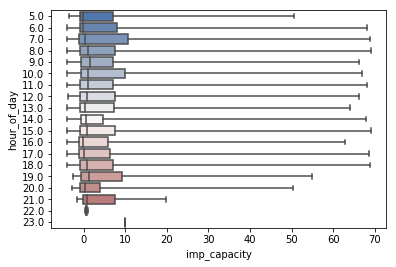

In [98]:
sns.boxplot(x=imp_hour_of_day.imp_capacity, y=imp_hour_of_day.hour_of_day, data=imp_hour_of_day, 
            whis=np.inf, orient='h', palette="vlag")

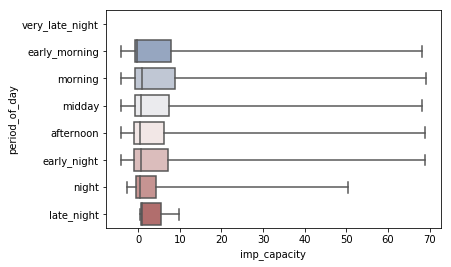

In [110]:
col_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
sns.boxplot(x=imp_period_of_day.imp_capacity, y=imp_period_of_day.period_of_day, data=imp_hour_of_day,
            order=col_order,whis=np.inf, palette="vlag")

#### Per Day of Week (Sun-Sat)

#### Per Day Type (Mon,Fri,Tue-Thu,Sat-Sun)